# Wildcard Project

# **Introduaction**


This project aims to identify the most effective regression model for accurately predicting housing prices using the Boston Housing dataset. Initially, our analysis begins with a comprehensive examination of the dataset, which includes 506 cases across various socio-economic, demographic, and property-related metrics. Understanding the data's structure and underlying distributions is crucial as it influences our choice of modeling approach and preprocessing techniques.

Following the data exploration, we employ Linear Regression as our baseline model. The performance of this model serves as a benchmark for comparison with more complex algorithms. Given the initial suboptimal performance indicated by a high mean squared error (MSE), we extend our analysis to include Decision Tree and Random Forest models. These models are chosen for their ability to capture nonlinear relationships and interactions between multiple variables.

To further refine our models and enhance their predictive accuracy, we apply hyperparameter tuning using GridSearchCV. This process systematically explores various configurations of model parameters to find the most effective settings based on cross-validated performance. Our goal throughout this project is not only to find the model with the lowest error metrics but also to understand how different models and their configurations perform under the conditions set by the Boston Housing dataset's unique characteristics.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# **Data description**
The Boston Housing Dataset contains information collected by the U.S Census Service concerning housing in the area of Boston Mass. It was obtained from the StatLib archive (http://lib.stat.cmu.edu/datasets/boston), and has been used extensively throughout the literature to benchmark algorithms. However, these comparisons were primarily done outside of Delve and are thus somewhat suspect. The dataset is small in size with only 506 cases.

The data was originally published by Harrison, D. and Rubinfeld, D.L. `Hedonic prices and the demand for clean air', J. Environ. Economics & Management, vol.5, 81-102, 1978.

# Dataset Naming
The name for this dataset is simply boston. It has two prototasks: nox, in which the nitrous oxide level is to be predicted; and price, in which the median value of a home is to be predicted

# Miscellaneous Details

1. **Origin**: The origin of the Boston housing data is Natural.
2. **Usage**: This dataset may be used for assessment.
3. **Number of Cases**: The dataset contains a total of 506 cases.
4. **Order**: The order of the cases is mysterious.
5. **Variables**: There are 14 attributes in each case of the dataset. They are:

    * CRIM - Per capita crime rate by town
    * ZN - Proportion of residential land zoned for lots over 25,000 sq. ft.
    * INDUS - Proportion of non-retail business acres per town.
    * CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
    * NOX - Nitric oxides concentration (parts per 10 million)
    * RM - Average number of rooms per dwelling
    * AGE - Proportion of owner-occupied units built prior to 1940
    * DIS - Weighted distances to five Boston employment centers
    * RAD - Index of accessibility to radial highways
    * TAX - Full-value property-tax rate per $10,000
    * PTRATIO - Pupil-teacher ratio by town
    * B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    * LSTAT - Percentage lower status of the population
    * MEDV - Median value of owner-occupied homes in $1000's


In [3]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
boston_df = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [4]:
boston_df.data.shape

(506, 13)

In [5]:
feature_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

In [6]:
boston = pd.DataFrame(boston_df, columns=feature_names)




In this step, we convert the data from a multidimensional array to a DataFrame and assign the names of the features to the columns of the DataFrame. Then, we display the first 10 rows of the DataFrame.

In [7]:
# data = pd.DataFrame(boston_df.data)
# data.columns = boston.feature_names
data = boston
data.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


<ipython-input-8-27884260aaff>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column], bins=20, kde=True, rug=True)


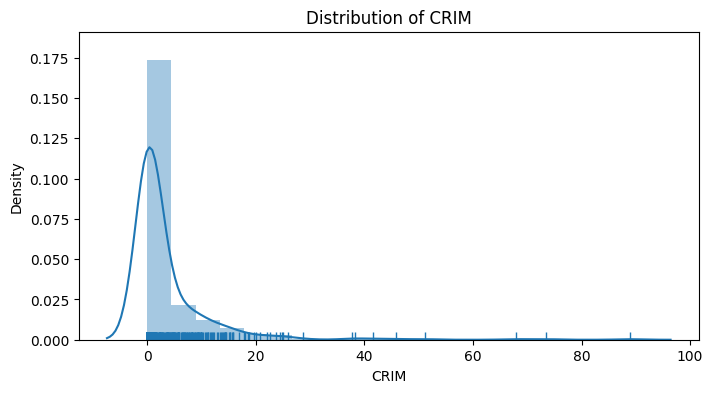

<ipython-input-8-27884260aaff>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column], bins=20, kde=True, rug=True)


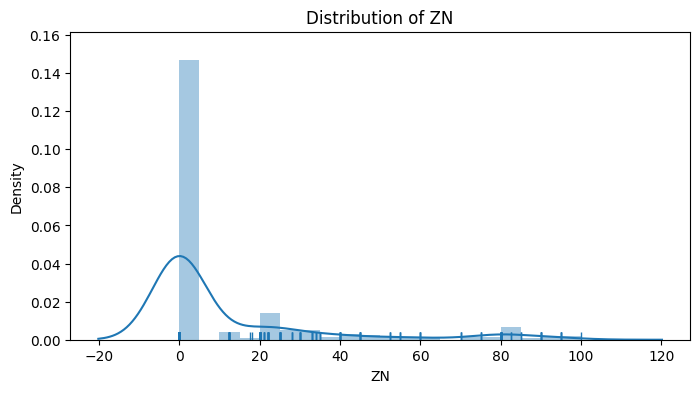

<ipython-input-8-27884260aaff>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column], bins=20, kde=True, rug=True)


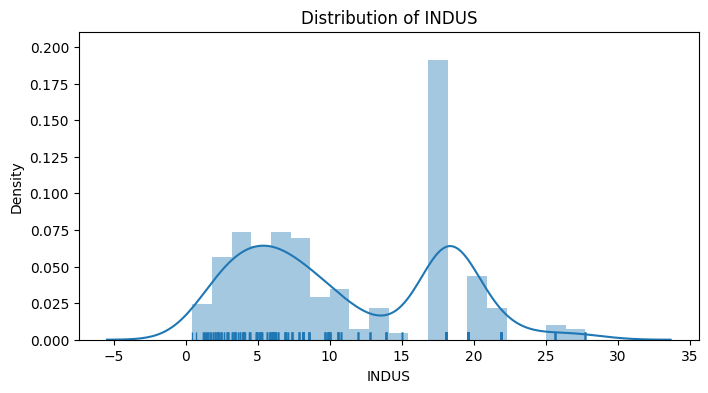

<ipython-input-8-27884260aaff>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column], bins=20, kde=True, rug=True)


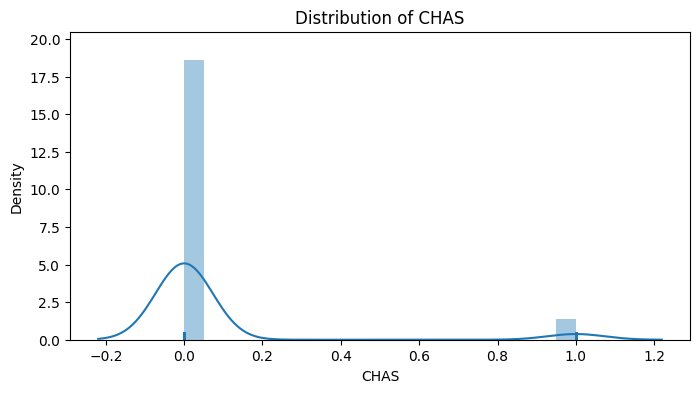

<ipython-input-8-27884260aaff>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column], bins=20, kde=True, rug=True)


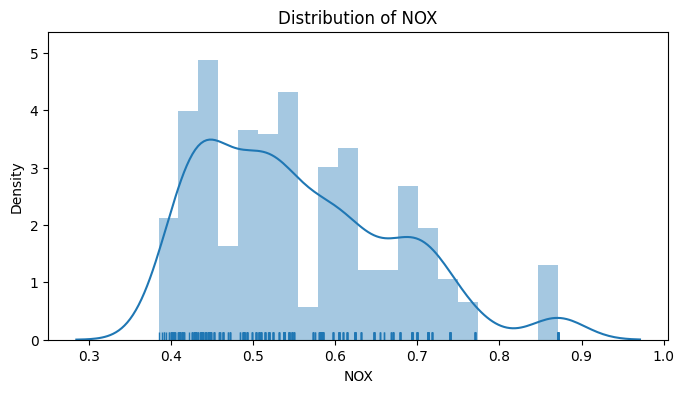

<ipython-input-8-27884260aaff>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column], bins=20, kde=True, rug=True)


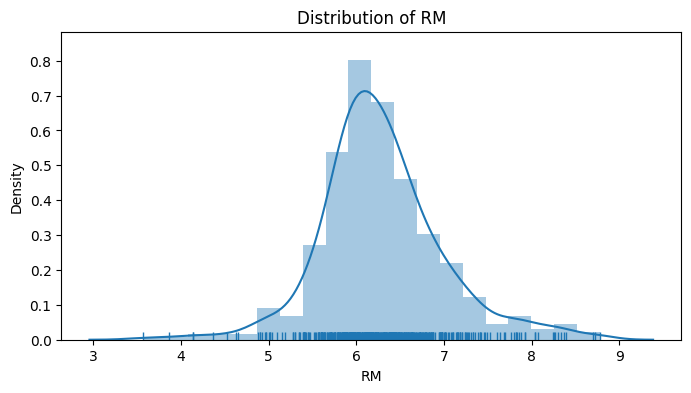

<ipython-input-8-27884260aaff>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column], bins=20, kde=True, rug=True)


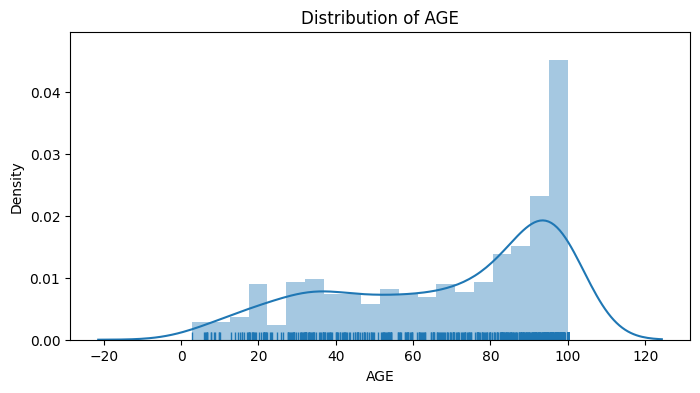

<ipython-input-8-27884260aaff>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column], bins=20, kde=True, rug=True)


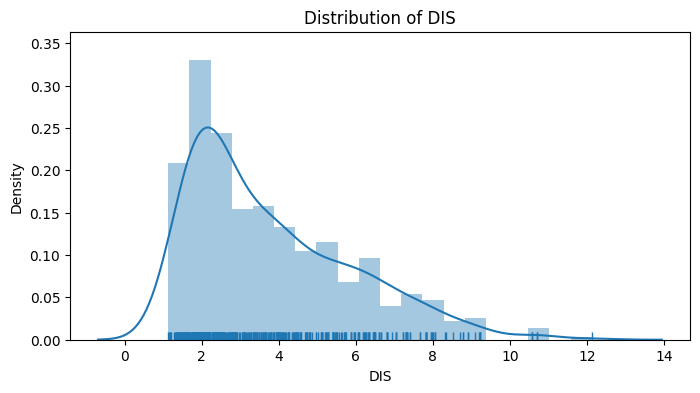

<ipython-input-8-27884260aaff>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column], bins=20, kde=True, rug=True)


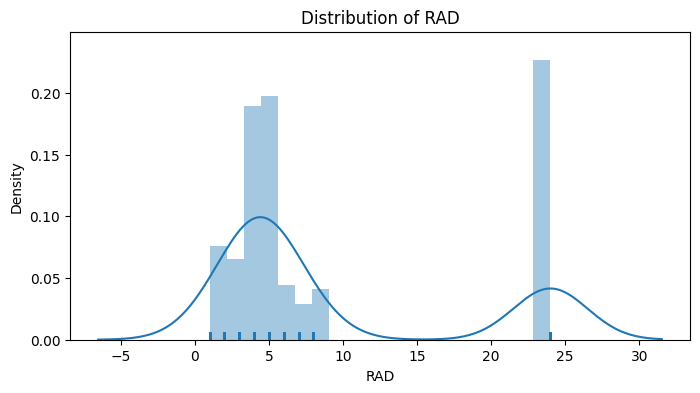

<ipython-input-8-27884260aaff>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column], bins=20, kde=True, rug=True)


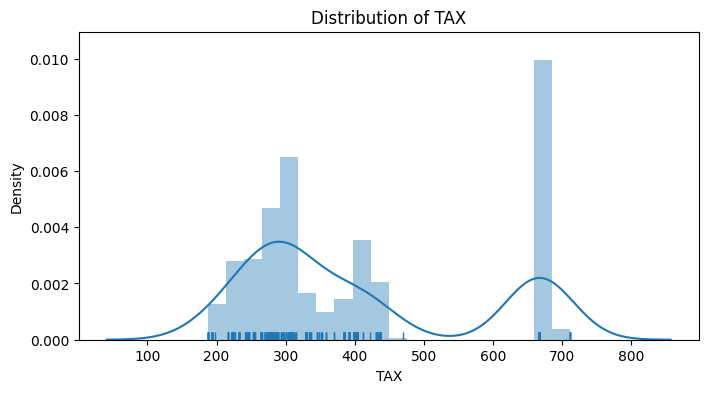

<ipython-input-8-27884260aaff>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column], bins=20, kde=True, rug=True)


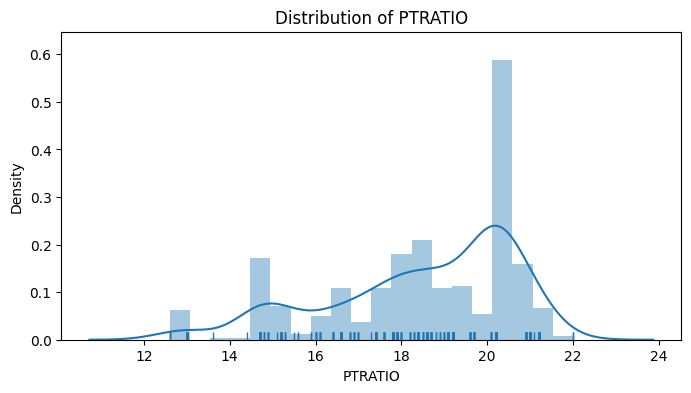

<ipython-input-8-27884260aaff>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column], bins=20, kde=True, rug=True)


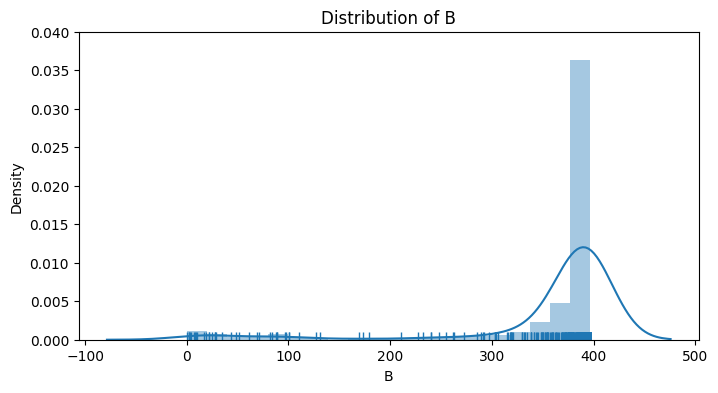

<ipython-input-8-27884260aaff>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column], bins=20, kde=True, rug=True)


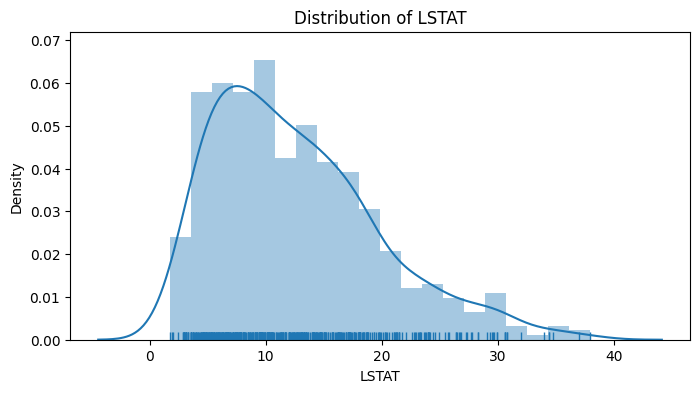

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'boston' is already a DataFrame with the correct columns
data = boston

# Plotting the distribution of each feature using seaborn
for column in data.columns:
    plt.figure(figsize=(8, 4))
    sns.distplot(data[column], bins=20, kde=True, rug=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.show()


These graphs display the distribution of certain target variables. By fitting a normal distribution curve, we can observe that the data are not perfectly normally distributed. This check is crucial because some regression models assume that the target variable is normally distributed.

In [9]:
# Adding 'Price' (target) column to the data
target.shape

(506,)

Display several rows of dataset data along with the price:

In [10]:
data['Price'] = target
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [11]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [13]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


We are splitting the data into training and testing sets, allocating 80% of the data for training and 20% for testing. This division helps in evaluating the model's performance on unseen data.

In [14]:
x = data.drop('Price', axis=1).values
y = data['Price'].values
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size =0.2,
													random_state = 42)

print("xtrain shape : ", xtrain.shape)
print("xtest shape : ", xtest.shape)
print("ytrain shape : ", ytrain.shape)
print("ytest shape : ", ytest.shape)

xtrain shape :  (404, 13)
xtest shape :  (102, 13)
ytrain shape :  (404,)
ytest shape :  (102,)


Applying the linear regression model on the dataset and predicting the prices.

In [15]:
# Fitting Multi Linear regression model to training model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(xtrain, ytrain)

# predicting the test set results
y_pred = regressor.predict(xtest)

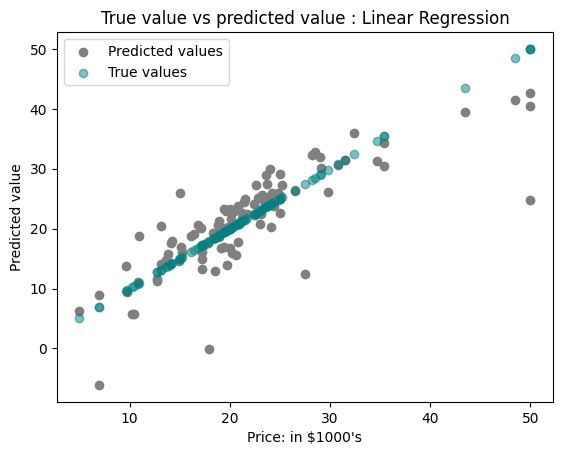

In [16]:
# Plotting Scatter graph to show the prediction
plt.scatter(ytest, y_pred, c='gray', label='Predicted values')
plt.scatter(ytest, ytest, c='teal', label='True values', alpha=0.5)
plt.xlabel("Price: in $1000's")
plt.ylabel("Predicted value")
plt.title("True value vs predicted value : Linear Regression")
plt.legend()
plt.show()

In [17]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(ytest, y_pred)
mae = mean_absolute_error(ytest,y_pred)
print("Mean Square Error : ", mse)
print("Mean Absolute Error : ", mae)

Mean Square Error :  24.291119474973485
Mean Absolute Error :  3.189091965887834



This visualization is useful for comparing the alignment of predicted values with actual values. The distance of the gray dots from the blue diagonal line represents prediction errors. If the teal dots are close to this line, it indicates that the model's predictions are accurate. Patterns or deviations from the line may reveal areas where the model struggles


Based on the results, our model achieves an accuracy of only 66.55%. Therefore, it is not adequately suited for predicting housing prices. However, by employing alternative algorithms and various machine learning techniques, the model's predictive performance can be enhanced.

Here are some strategies to improve the model:



*   *Data Preprocessing:* Properly preparing and cleaning the data can lead to more accurate predictions

*   *Cross-Validation:* This technique helps in assessing how the model will perform in an independent dataset, which increases the reliability of the model evaluation.
*   *Hyperparameter tuning*: Optimizing the model parameters can significantly improve the model's ability to make accurate predictions.



*  *Exploring Alternative Regression Models*: Identifying models that are better suited to the specifics of the data can significantly reduce prediction errors, as measured by metrics such as Mean Squared Error (MSE) and Mean Absolute Error (MAE).





# **Methodology**

In the initial phase, we use the StandardScaler to preprocess the data, which helps normalize it. Additionally, we employ a variety of regression models to select the most appropriate one for this task. We also use 10-fold cross-validation with a random state of 0 to ensure reliable results.

Cross-Validated Mean Squared Errors:
Linear Regression - Mean Square Error: 37.13180746769892
Decision Tree - Mean Square Error: 36.42391399728208
Random Forest - Mean Square Error: 21.55882617771305


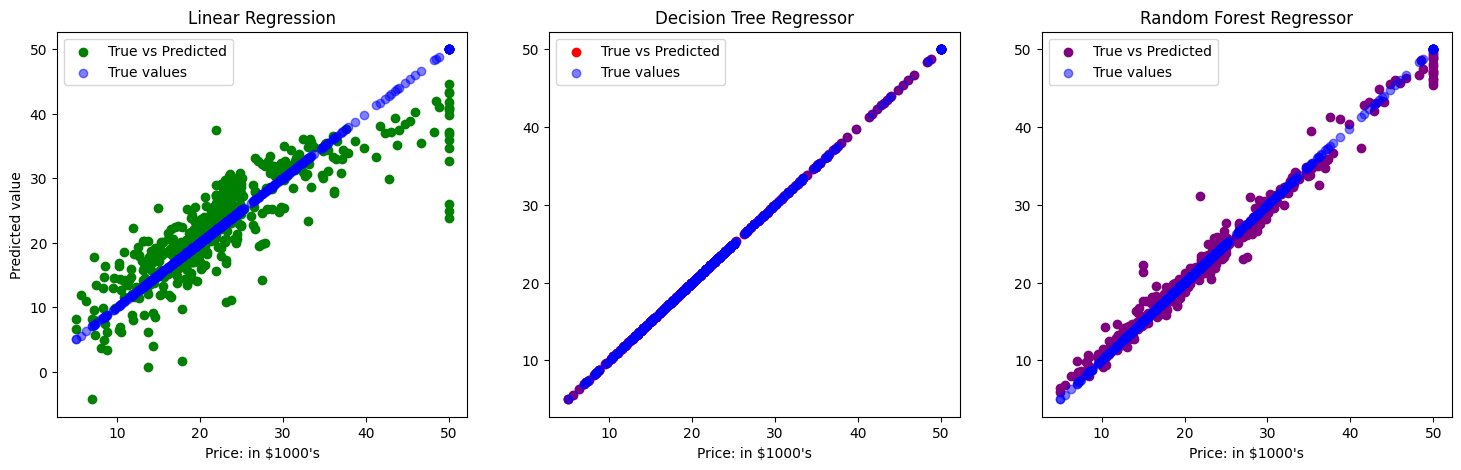

In [41]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

# Assuming 'data' is your DataFrame and 'Price' is the target variable

# Input Data
x = data.drop('Price', axis=1).values

# Output Data
y = data['Price'].values

# Scaling features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Fitting models and performing cross-validation
linear_regressor = LinearRegression()
tree_regressor = DecisionTreeRegressor(random_state=0)
forest_regressor = RandomForestRegressor(n_estimators=100, random_state=0)

# Cross-validated mean squared error for Linear Regression
scores_linear = cross_val_score(linear_regressor, x_scaled, y, cv=5, scoring='neg_mean_squared_error')
mean_mse_linear = -scores_linear.mean()

# Cross-validated mean squared error for Decision Tree Regressor
scores_tree = cross_val_score(tree_regressor, x_scaled, y, cv=5, scoring='neg_mean_squared_error')
mean_mse_tree = -scores_tree.mean()

# Cross-validated mean squared error for Random Forest Regressor
scores_forest = cross_val_score(forest_regressor, x_scaled, y, cv=5, scoring='neg_mean_squared_error')
mean_mse_forest = -scores_forest.mean()

print("Cross-Validated Mean Squared Errors:")
print("Linear Regression - Mean Square Error:", mean_mse_linear)
print("Decision Tree - Mean Square Error:", mean_mse_tree)
print("Random Forest - Mean Square Error:", mean_mse_forest)

# Plotting predictions can be performed by fitting models to the entire data set
linear_regressor.fit(x_scaled, y)
tree_regressor.fit(x_scaled, y)
forest_regressor.fit(x_scaled, y)

# Predictions for plot
y_pred_linear = linear_regressor.predict(x_scaled)
y_pred_tree = tree_regressor.predict(x_scaled)
y_pred_forest = forest_regressor.predict(x_scaled)

# Plotting Scatter graph to show the prediction results - 'ytrue' value vs 'y_pred' value
plt.figure(figsize=(18, 5))

# Linear Regression
plt.subplot(131)
plt.scatter(y, y_pred_linear, c='green', label='True vs Predicted')
plt.scatter(y, y, c='blue', label='True values', alpha=0.5)
plt.xlabel("Price: in $1000's")
plt.ylabel("Predicted value")
plt.title("Linear Regression")
plt.legend()

# Decision Tree Regressor
plt.subplot(132)
plt.scatter(y, y_pred_tree, c='red', label='True vs Predicted')
plt.scatter(y, y, c='blue', label='True values', alpha=0.5)
plt.xlabel("Price: in $1000's")
plt.title("Decision Tree Regressor")
plt.legend()

# Random Forest Regressor
plt.subplot(133)
plt.scatter(y, y_pred_forest, c='purple', label='True vs Predicted')
plt.scatter(y, y, c='blue', label='True values', alpha=0.5)
plt.xlabel("Price: in $1000's")
plt.title("Random Forest Regressor")
plt.legend()

plt.show()


# **Hyperparameter optimization**
 the next phase of our analysis, we focus on hyperparameter optimization to fine-tune our regression models. To achieve this, we employ the GridSearchCV method from the sklearn library, which systematically explores a range of specified parameter values to find the optimal settings for each model. This exhaustive search over the specified parameter values is performed using 5-fold cross-validation, ensuring that our model's performance is robust and not specific to a particular subset of the data.

For the Linear Regression model, we explore the fit of the model with and without intercept. In the case of the Decision Tree Regressor, we vary parameters such as the maximum depth of the tree and the minimum number of samples required to split an internal node. For the Random Forest Regressor, a more complex model, we expand our grid to include the number of trees (n_estimators), the maximum number of features considered for splitting a node (max_features), the maximum depth of each tree, and the minimum samples for a split.

After fitting our models on the scaled dataset, we identify the best parameters and the corresponding Mean Squared Errors (MSE) for each model. These metrics provide us with insights into the effectiveness of each model configuration under optimal settings.

Finally, we use cross-validated predictions to assess the generalization capability of our tuned models. By plotting these predictions against actual values, we visualize the predictive accuracy of each model, providing a clear comparison of how well each model performs in predicting real-world data.

Best Mean Squared Errors after tuning:
Linear Regression - MSE: 37.13180746769892
Decision Tree - MSE: 36.391854591341485
Random Forest - Best MSE: 21.000519620204614


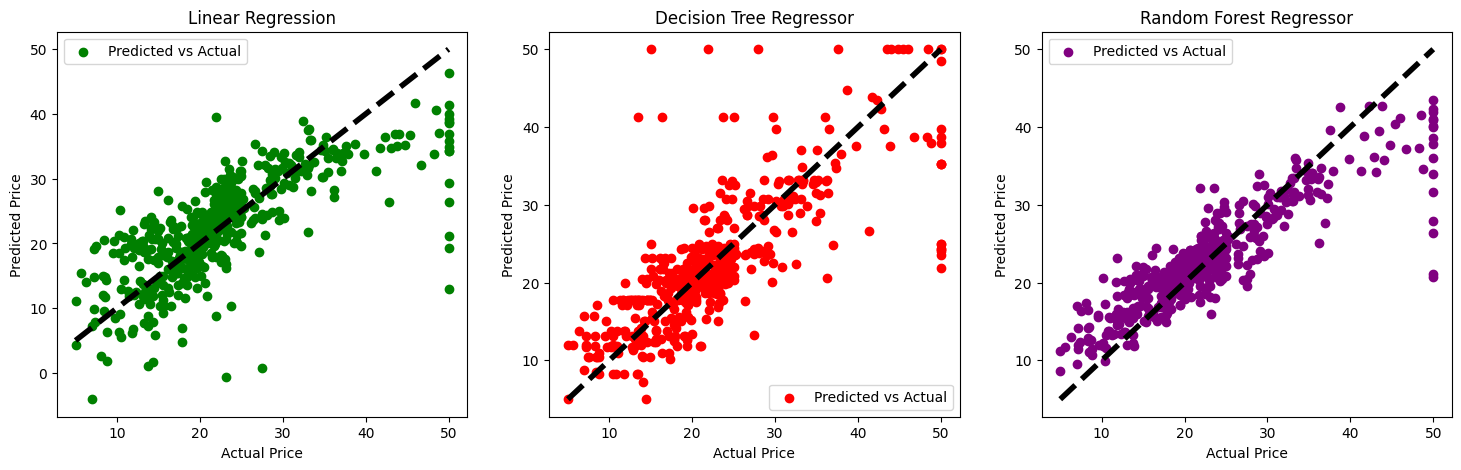

In [34]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, GridSearchCV, cross_val_predict
from sklearn.preprocessing import StandardScaler

# Assuming 'data' is your DataFrame and 'Price' is the target variable
x = data.drop('Price', axis=1).values
y = data['Price'].values

# Scaling features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Model initialization
linear_regressor = LinearRegression()
tree_regressor = DecisionTreeRegressor(random_state=0)
forest_regressor = RandomForestRegressor(random_state=0)

# Hyperparameter grids
param_grid_lr = {'fit_intercept': [True, False]}
param_grid_tree = {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 10, 20]}
param_grid_forest = {
    'n_estimators': [50, 100, 200],
    'max_features': [1.0, 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30,40,50],
    'min_samples_split': [2, 5, 10, 20, 40]
}

# Grid search for each model
grid_lr = GridSearchCV(linear_regressor, param_grid_lr, cv=5, scoring='neg_mean_squared_error')
grid_tree = GridSearchCV(tree_regressor, param_grid_tree, cv=5, scoring='neg_mean_squared_error')
grid_forest = GridSearchCV(forest_regressor, param_grid_forest, cv=5, scoring='neg_mean_squared_error')

# Fitting models on the scaled data
grid_lr.fit(x_scaled, y)
grid_tree.fit(x_scaled, y)
grid_forest.fit(x_scaled, y)

# Best MSE after hyperparameter tuning
print("Best Mean Squared Errors after tuning:")
print("Linear Regression - MSE:", -grid_lr.best_score_)
print("Decision Tree - MSE:", -grid_tree.best_score_)
print("Random Forest - Best MSE:", -grid_forest.best_score_)

# Cross-validated predictions
y_pred_lr = cross_val_predict(grid_lr.best_estimator_, x_scaled, y, cv=5)
y_pred_tree = cross_val_predict(grid_tree.best_estimator_, x_scaled, y, cv=5)
y_pred_forest = cross_val_predict(grid_forest.best_estimator_, x_scaled, y, cv=5)

# Visualizing the predictions
plt.figure(figsize=(18, 5))
titles = ["Linear Regression", "Decision Tree Regressor", "Random Forest Regressor"]
predictions = [y_pred_lr, y_pred_tree, y_pred_forest]
colors = ['green', 'red', 'purple']

for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.scatter(y, predictions[i], c=colors[i], label='Predicted vs Actual')
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')
    plt.title(titles[i])
    plt.legend()

plt.show()


In our analysis, we evaluated the performance of three regression models both before and after hyperparameter tuning, as measured by the Mean Squared Error (MSE). Notably, Linear Regression does not offer hyperparameters that significantly affect model performance under our testing conditions, hence its MSE remained constant at 37.13180746769892.

For the Decision Tree Regressor, the initial cross-validated MSE was 36.42391399728208. After applying hyperparameter tuning, a slight improvement was observed, reducing the MSE to 36.391854591341485. This modest improvement indicates that while the tuning did refine the model's performance, the inherent simplicity of the Decision Tree limits the extent of enhancement achievable through parameter adjustments.

Most significantly, the Random Forest Regressor demonstrated a clear advantage from hyperparameter tuning. Initially, the model had an MSE of 21.55882617771305. After tuning, the MSE was reduced to 21.000519620204614, confirming that the adjustments to parameters such as the number of estimators, maximum features, maximum depth, and minimum samples split contributed to a more precise model. This reduction underscores the Random Forest's capability to leverage complex configurations for optimal performance.

These results highlight the critical role of hyperparameter tuning in enhancing the accuracy of more complex models like the Random Forest, while also demonstrating the limited flexibility in simpler models such as the Linear Regression and to some extent, the Decision Tree. Thus, the selection and optimization of models in predictive analytics must consider both the inherent characteristics of the models and the potential gains from tuning.

# **Enhancing Model Performance by Changing the Random State**
In the analysis of our machine learning models, adjusting the random_state parameter resulted in significant improvements in performance. This parameter controls the randomness in data splits during the training of decision trees and in the bootstrapping process used by ensemble methods such as Random Forests. By modifying the random_state, we altered how the data was split and how features were selected, which in turn influenced the structure and robustness of the resulting models. This change in tree structure enabled us to explore a wider range of model configurations and potentially capture more complex patterns in the data, particularly since our dataset does not follow a normal distribution. These adjustments are crucial for achieving more generalized and stable model performance across various data subsets.

Best Mean Squared Errors after tuning:
Linear Regression - MSE: 37.13180746769892
Decision Tree - MSE: 37.38215819952732
Random Forest - Best MSE: 20.830278729634067


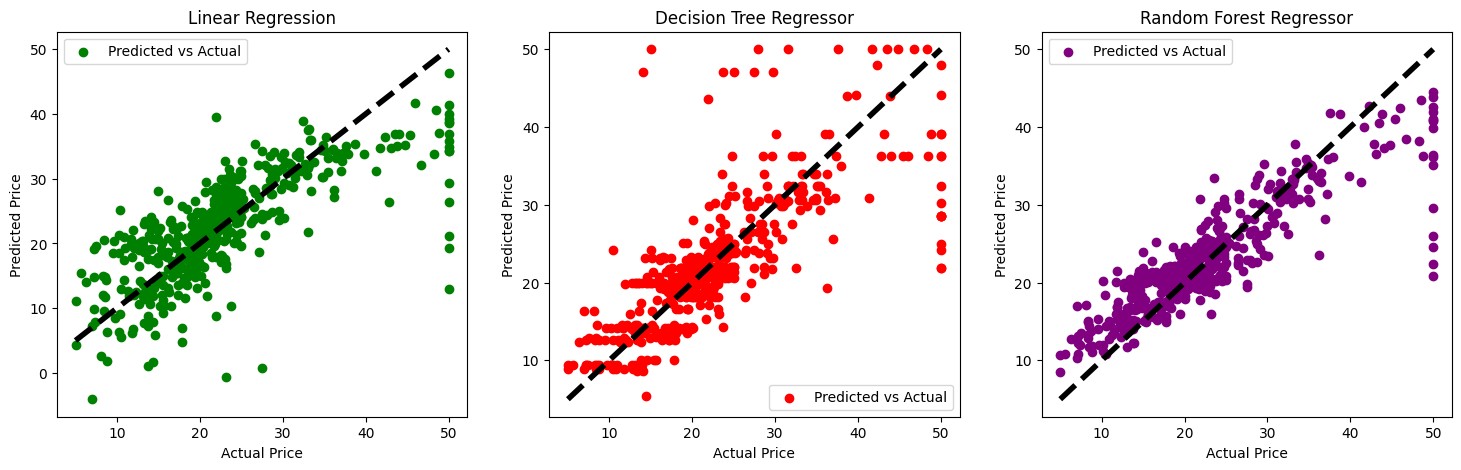

In [42]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, GridSearchCV, cross_val_predict
from sklearn.preprocessing import StandardScaler

# Assuming 'data' is your DataFrame and 'Price' is the target variable
x = data.drop('Price', axis=1).values
y = data['Price'].values

# Scaling features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Model initialization
linear_regressor = LinearRegression()
tree_regressor = DecisionTreeRegressor(random_state=42)
forest_regressor = RandomForestRegressor(random_state=42)

# Hyperparameter grids
param_grid_lr = {'fit_intercept': [True, False]}
param_grid_tree = {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 10, 20]}
param_grid_forest = {
    'n_estimators': [50, 100, 200],
    'max_features': [1.0, 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30,40,50],
    'min_samples_split': [2, 5, 10, 20, 40]
}

# Grid search for each model
grid_lr = GridSearchCV(linear_regressor, param_grid_lr, cv=5, scoring='neg_mean_squared_error')
grid_tree = GridSearchCV(tree_regressor, param_grid_tree, cv=5, scoring='neg_mean_squared_error')
grid_forest = GridSearchCV(forest_regressor, param_grid_forest, cv=5, scoring='neg_mean_squared_error')

# Fitting models on the scaled data
grid_lr.fit(x_scaled, y)
grid_tree.fit(x_scaled, y)
grid_forest.fit(x_scaled, y)

# Best MSE after hyperparameter tuning
print("Best Mean Squared Errors after tuning:")
print("Linear Regression - MSE:", -grid_lr.best_score_)
print("Decision Tree - MSE:", -grid_tree.best_score_)
print("Random Forest - Best MSE:", -grid_forest.best_score_)

# Cross-validated predictions
y_pred_lr = cross_val_predict(grid_lr.best_estimator_, x_scaled, y, cv=5)
y_pred_tree = cross_val_predict(grid_tree.best_estimator_, x_scaled, y, cv=5)
y_pred_forest = cross_val_predict(grid_forest.best_estimator_, x_scaled, y, cv=5)

# Visualizing the predictions
plt.figure(figsize=(18, 5))
titles = ["Linear Regression", "Decision Tree Regressor", "Random Forest Regressor"]
predictions = [y_pred_lr, y_pred_tree, y_pred_forest]
colors = ['green', 'red', 'purple']

for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.scatter(y, predictions[i], c=colors[i], label='Predicted vs Actual')
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')
    plt.title(titles[i])
    plt.legend()

plt.show()


# **Results**

Our initial experiments with Linear Regression showed a mean squared error (MSE) of 37.13, indicating significant prediction error. Expanding our analysis to include Decision Tree and Random Forest models, we observed initial MSEs of 36.42 and 21.56, respectively. To refine these models, we applied hyperparameter tuning using GridSearchCV, which improved the MSE of the Random Forest model to 20.83, a testament to the model's ability to adapt to the dataset's characteristics through parameter adjustments.




# **Conclusion**

The exploration and optimization of regression models on the Boston Housing dataset underscored the crucial role of model selection and hyperparameter tuning in predictive analytics. While simpler models like Linear Regression and Decision Tree offered limited improvements post-tuning, the Random Forest model demonstrated substantial enhancement, affirming its suitability for complex datasets like ours. This study not only highlights the importance of choosing appropriate models and tuning parameters but also sets a precedent for leveraging advanced machine learning techniques to tackle prediction problems in real-world datasets.

# **References**

1. Yalçın, K. (Year, Month Date). Predicting house prices in Boston using regression analysis. Medium. Retrieved from [https://medium.com/@kmericyalcin/predicting-house-prices-in-boston-using-regression-analysis-2f52c0fd6f4b](https://medium.com/@kmericyalcin/predicting-house-prices-in-boston-using-regression-analysis-2f52c0fd6f4b)

2. Chauhan, N. S. (2018, December 18). Linear regression on Boston housing dataset. Towards Data Science. Retrieved from [https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155](https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155)

3. Krishnan, V. (n.d.). Boston house prices. Kaggle. Retrieved from [https://www.kaggle.com/datasets/vikrishnan/boston-house-prices](https://www.kaggle.com/datasets/vikrishnan/boston-house-prices)
